In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


In [ ]:
!pip install grad-cam
!pip install torch_lr_finder

In [2]:
from Dataset import Dataset
from utils import *
from main import *
from Model import *
from torchsummary import summary

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
trainloader = Dataset.trainloader
testloader =  Dataset.testloader

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


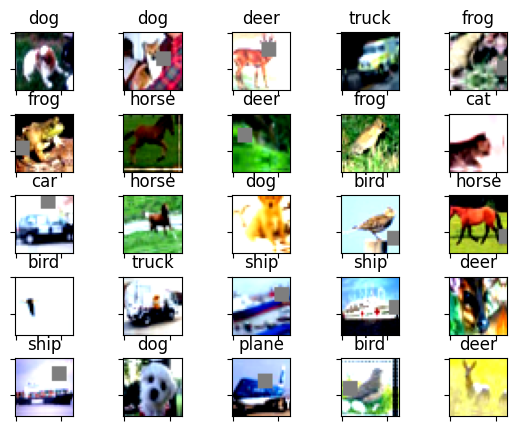

In [4]:
displayimage(trainloader, classes)

#Network

In [5]:
device = getdevice()
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.38E-02


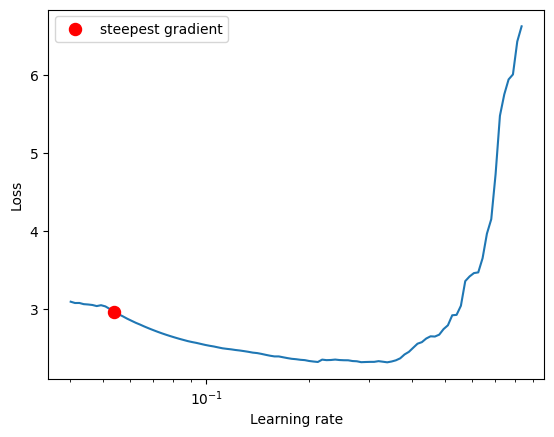

In [6]:
criterion, optimizer = define_optim_criterion(net)
run_lrfinder(net, optimizer, criterion, device, trainloader)

In [7]:
import torch
from torch.optim import lr_scheduler

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
scheduler=lr_scheduler.OneCycleLR(optimizer, max_lr=5.38E-02, steps_per_epoch=2, epochs=20, pct_start=0.25, div_factor=100, final_div_factor=100, three_phase=True, anneal_strategy='linear')

In [8]:
train_acc, test_acc, learning_rate = run_train_eval(scheduler, optimizer, net, device, trainloader, testloader, criterion)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


lr=  0.006456000000000001


100%|██████████| 98/98 [01:05<00:00,  1.50it/s]


Epoch= 0 Loss=1.7012685537338257 Accuracy=39.88


100%|██████████| 20/20 [00:07<00:00,  2.68it/s]


Accuracy of the network on the 10000 test images: 41.03 %
lr=  0.012374000000000001


100%|██████████| 98/98 [01:04<00:00,  1.52it/s]


Epoch= 1 Loss=1.5039427280426025 Accuracy=46.43


100%|██████████| 20/20 [00:08<00:00,  2.30it/s]


Accuracy of the network on the 10000 test images: 47.25 %
lr=  0.018292


100%|██████████| 98/98 [01:06<00:00,  1.48it/s]


Epoch= 2 Loss=1.5296801328659058 Accuracy=49.11


100%|██████████| 20/20 [00:07<00:00,  2.82it/s]


Accuracy of the network on the 10000 test images: 52.42 %
lr=  0.024210000000000002


100%|██████████| 98/98 [01:06<00:00,  1.46it/s]


Epoch= 3 Loss=1.1826318502426147 Accuracy=59.52


100%|██████████| 20/20 [00:07<00:00,  2.64it/s]


Accuracy of the network on the 10000 test images: 62.57 %
lr=  0.030128000000000002


100%|██████████| 98/98 [01:06<00:00,  1.47it/s]


Epoch= 4 Loss=0.9331158399581909 Accuracy=72.32


100%|██████████| 20/20 [00:07<00:00,  2.56it/s]


Accuracy of the network on the 10000 test images: 62.66 %
lr=  0.036045999999999995


100%|██████████| 98/98 [01:07<00:00,  1.46it/s]


Epoch= 5 Loss=0.8731489777565002 Accuracy=74.40


100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


Accuracy of the network on the 10000 test images: 60.82 %
lr=  0.041964


100%|██████████| 98/98 [01:08<00:00,  1.42it/s]


Epoch= 6 Loss=0.7421709895133972 Accuracy=79.17


100%|██████████| 20/20 [00:07<00:00,  2.69it/s]


Accuracy of the network on the 10000 test images: 71.09 %
lr=  0.047882


100%|██████████| 98/98 [01:08<00:00,  1.42it/s]


Epoch= 7 Loss=0.818528950214386 Accuracy=78.27


100%|██████████| 20/20 [00:07<00:00,  2.55it/s]


Accuracy of the network on the 10000 test images: 75.25 %
lr=  0.0538


100%|██████████| 98/98 [01:07<00:00,  1.44it/s]


Epoch= 8 Loss=0.6882567405700684 Accuracy=84.23


100%|██████████| 20/20 [00:07<00:00,  2.82it/s]


Accuracy of the network on the 10000 test images: 75.21 %
lr=  0.047882


100%|██████████| 98/98 [01:10<00:00,  1.39it/s]


Epoch= 9 Loss=0.5509406328201294 Accuracy=85.71


100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


Accuracy of the network on the 10000 test images: 79.75 %
lr=  0.041964


100%|██████████| 98/98 [01:07<00:00,  1.46it/s]


Epoch= 10 Loss=0.4881211221218109 Accuracy=88.99


100%|██████████| 20/20 [00:06<00:00,  2.87it/s]


Accuracy of the network on the 10000 test images: 81.53 %
lr=  0.036046


100%|██████████| 98/98 [01:07<00:00,  1.44it/s]


Epoch= 11 Loss=0.41469377279281616 Accuracy=91.96


100%|██████████| 20/20 [00:07<00:00,  2.50it/s]


Accuracy of the network on the 10000 test images: 84.36 %
lr=  0.030128


100%|██████████| 98/98 [01:07<00:00,  1.44it/s]


Epoch= 12 Loss=0.45703426003456116 Accuracy=87.80


100%|██████████| 20/20 [00:06<00:00,  2.94it/s]


Accuracy of the network on the 10000 test images: 86.51 %
lr=  0.02421


100%|██████████| 98/98 [01:07<00:00,  1.45it/s]


Epoch= 13 Loss=0.40759754180908203 Accuracy=89.88


100%|██████████| 20/20 [00:08<00:00,  2.34it/s]


Accuracy of the network on the 10000 test images: 87.64 %
lr=  0.018292000000000003


100%|██████████| 98/98 [01:07<00:00,  1.46it/s]


Epoch= 14 Loss=0.3914989233016968 Accuracy=89.29


100%|██████████| 20/20 [00:09<00:00,  2.21it/s]


Accuracy of the network on the 10000 test images: 88.96 %
lr=  0.012373999999999996


100%|██████████| 98/98 [01:06<00:00,  1.47it/s]


Epoch= 15 Loss=0.35556983947753906 Accuracy=91.07


100%|██████████| 20/20 [00:07<00:00,  2.81it/s]


Accuracy of the network on the 10000 test images: 89.32 %
lr=  0.0064559999999999965


100%|██████████| 98/98 [01:08<00:00,  1.42it/s]


Epoch= 16 Loss=0.2655610740184784 Accuracy=91.07


100%|██████████| 20/20 [00:07<00:00,  2.75it/s]


Accuracy of the network on the 10000 test images: 90.44 %
lr=  0.0005379999999999968


100%|██████████| 98/98 [01:08<00:00,  1.44it/s]


Epoch= 17 Loss=0.21065232157707214 Accuracy=92.56


100%|██████████| 20/20 [00:08<00:00,  2.46it/s]


Accuracy of the network on the 10000 test images: 90.83 %
lr=  0.0005126371428571428


100%|██████████| 98/98 [01:08<00:00,  1.43it/s]


Epoch= 18 Loss=0.2353007048368454 Accuracy=92.26


100%|██████████| 20/20 [00:08<00:00,  2.25it/s]


Accuracy of the network on the 10000 test images: 90.92 %
lr=  0.00048727428571428567


100%|██████████| 98/98 [01:06<00:00,  1.47it/s]


Epoch= 19 Loss=0.24397151172161102 Accuracy=89.88


100%|██████████| 20/20 [00:07<00:00,  2.80it/s]

Accuracy of the network on the 10000 test images: 91.02 %
Finished Training


## Train/Test/LR curve

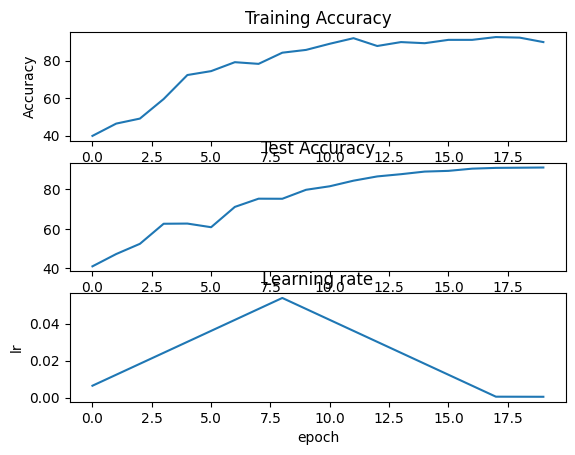

In [9]:
plot_curves(train_acc, test_acc, learning_rate)

In [10]:
torch.save(net, 'final_model.pt')

In [11]:
device = getdevice()
net = torch.load('final_model.pt').to(device)

## Misclassified Images

  0%|          | 0/20 [00:05<?, ?it/s]


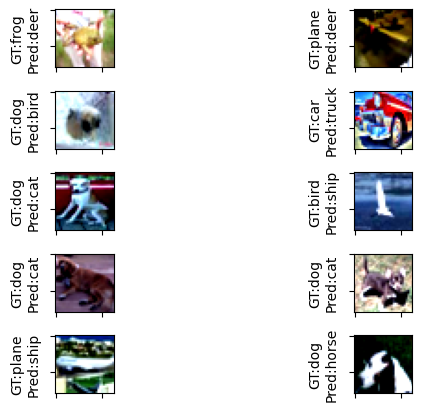

In [26]:
image_tensor, pred, targ = show_images(net, testloader, device, classes, 0)

<Figure size 640x480 with 0 Axes>

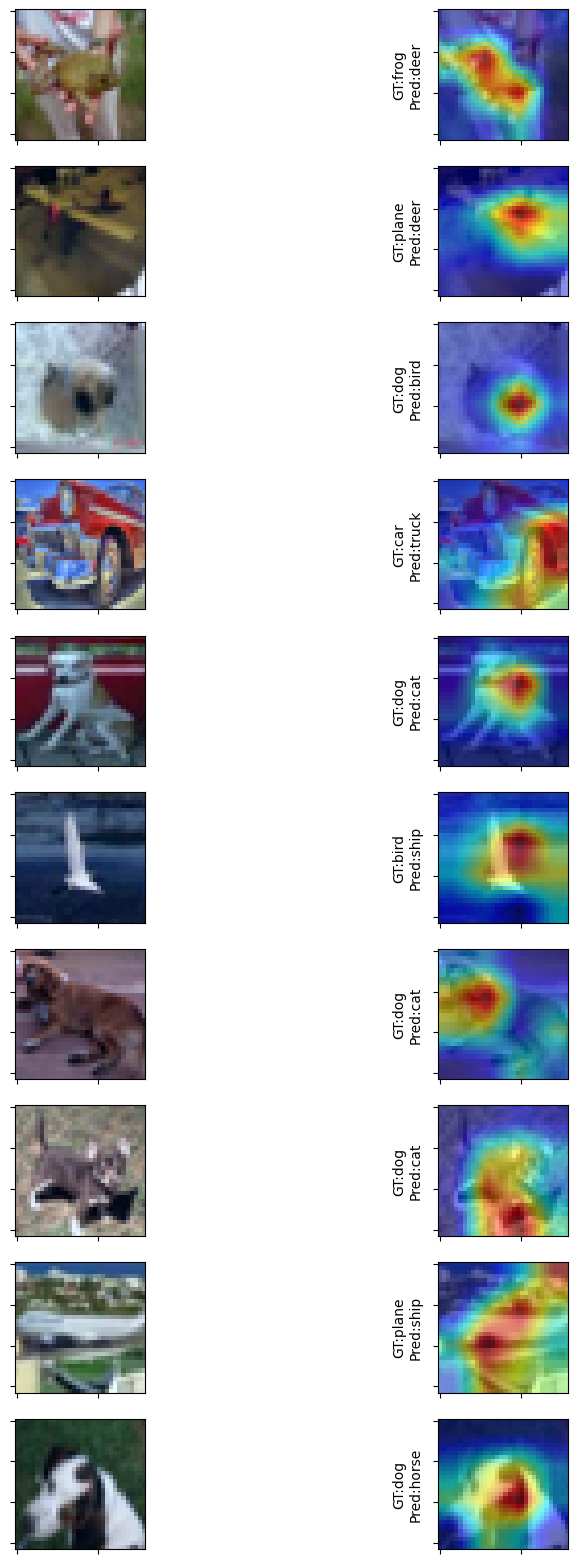

In [27]:
visualize_gradcam(net, image_tensor, targ, pred, classes)

#Correctly classified images

  0%|          | 0/20 [00:06<?, ?it/s]


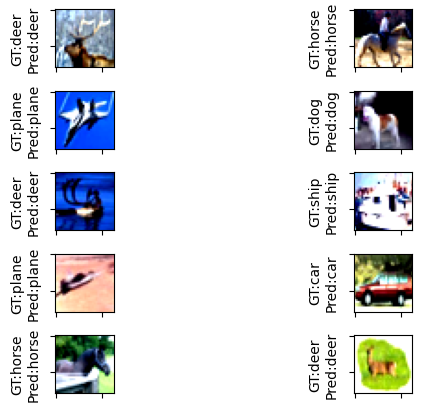

In [28]:
image_tensor, pred, targ = show_images(net, testloader, device, classes, 1)

<Figure size 640x480 with 0 Axes>

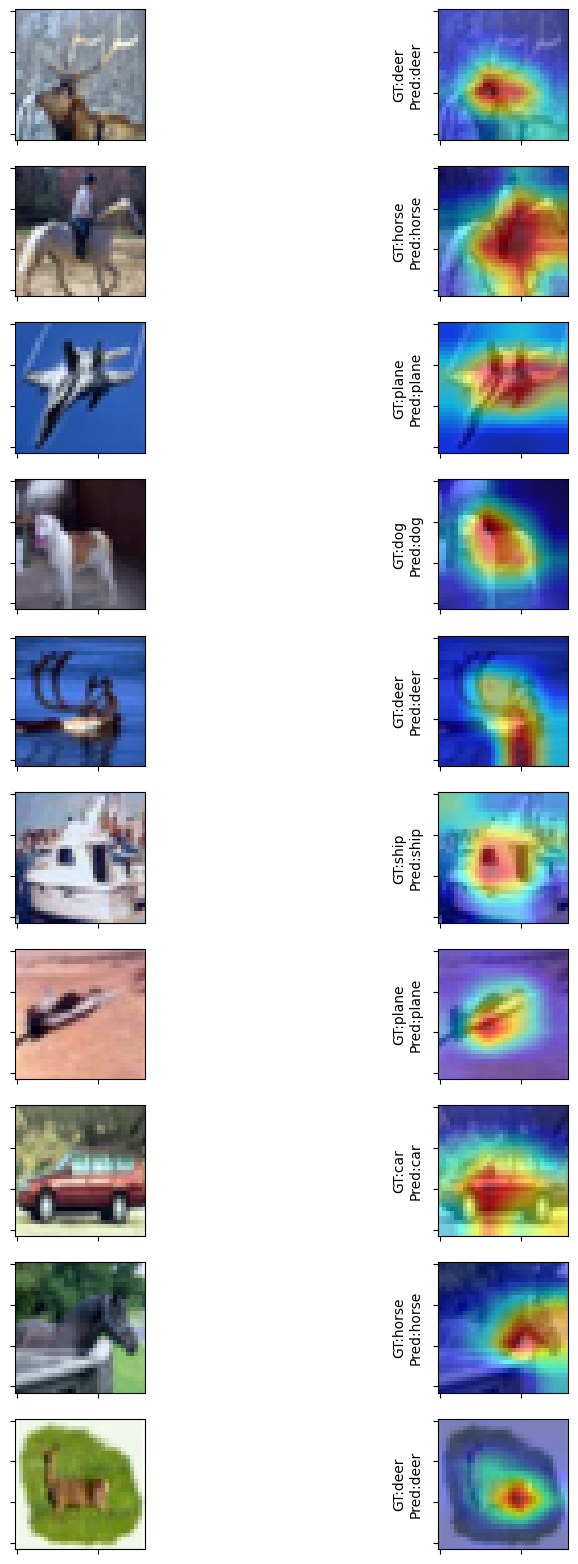

In [29]:
visualize_gradcam(net, image_tensor, targ, pred, classes)